In [2]:
%matplotlib inline
import matplotlib
import math
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.stats import chisquare
from astropy.cosmology import Planck15
from astropy import constants, units
import parameters



# Celestial Dynamics of Jupiter

In [3]:
JupiterMass= units.jupiterMass

In [4]:
(units.jupiterMass/units.solMass)*1

<Quantity 1.0 jupiterMass / solMass>

### Momentum Conservation
m= Jupiter mass
M = Sun mass
$$m\omega_1{R_1}^2=m\omega_2{R_2}^2$$  ->$$\omega_1{R_1}^2=\omega_2{R_2}^2$$
### Centripetal Force = Gravitational Force
$$m{\omega_1}^2{R_1}=\frac{GMm}{{R_1}^2}$$
or
$${\omega_1}^2{R_1}=\frac{GM}{{R_1}^2}$$
### Now change G to x G
$${\omega_2}^2{R_2}=\frac{xGM}{{R_2}^2}$$

$$\frac{{\omega_2}^2{R_2}^3}{{\omega_1}^2{R_1}^3}=x$$
$$R_2={\frac{R_1}{x}}$$

In [5]:
# Jupiter mass
JMass=1.898E27*units.kg
SMass=1.989E30*units.kg
MoonMass=7.34767309E22*units.kg
EarthMass=5.972E24*units.kg
EarthRadius=(3959*1.60934*units.km).to(units.m)
MoonDistance=(3e5*units.km).to(units.m)

EarthOrbitRadius=92.96E6*units.km*1.60934
x=13.58/(13.58-4.5)
CurrentJRadius=(483.8E6*units.km*1.60934).to(units.m)
OldJRadius = CurrentJRadius/x
GG=constants.G*EarthMass/EarthRadius**2
MoonAcceleration= GG*(4000*1.60934/3e5)**2
print(x, CurrentJRadius/EarthOrbitRadius,OldJRadius/EarthRadius)

1.4955947136563876 5204.388984509466 m / km 81708.35005790205


In [6]:
ForceOnMoon=MoonMass*MoonAcceleration
ForceOnMoon

<Quantity 3.3216348235314646e+20 kg m / s2>

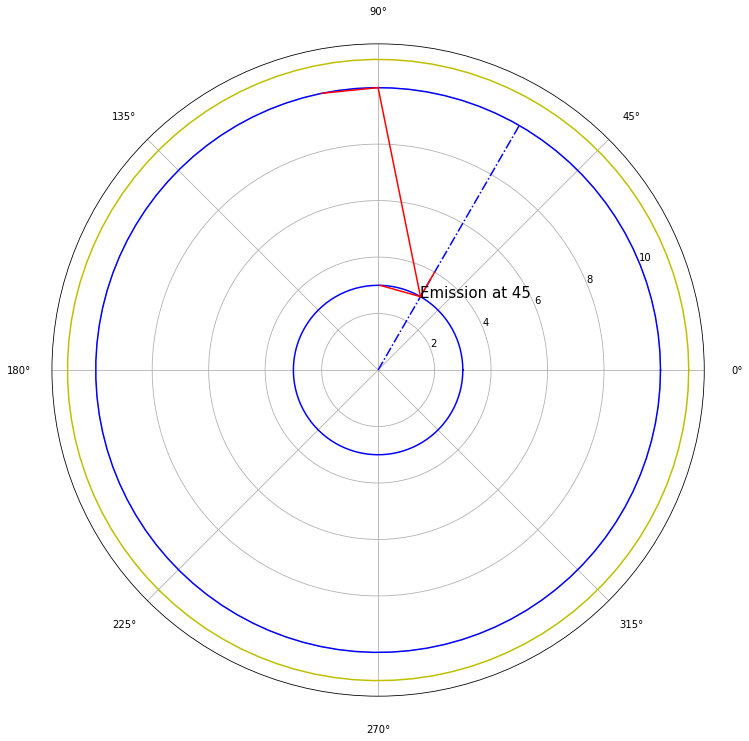

In [7]:

fig = plt.figure()
DefaultSize=[12,12]
fig.set_size_inches( DefaultSize )# resetthe size
ax = fig.add_subplot(111, polar=True)
ax.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*3, color='b', linestyle='-')
ax.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*10, color='b', linestyle='-')
ax.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*11, color='y', linestyle='-')
# Plot radial 1 at angle 30 degrees
r=0.5
# 30 degrees is pi/6
angle=np.pi/3
pi2=np.pi/2
ax.plot([angle,angle], [0,10], color='b', linestyle='-.')
ax.plot([angle,pi2], [3,10], color='r', linestyle='-')
# Plot radial 1 at angle 30 degrees
r=0.5
# 30 degrees is pi/6
angle=np.pi/3
pi2=np.pi/2
ax.text(angle, 3, r'Emission at 45', fontsize=15)

# Plot proper emission reference frame
lambda_=1.0
period=1.0
velocity=lambda_/period
ax.plot([angle,angle], [3,3+period], color='r', linestyle='-')
ax.plot([angle,angle+0.5], [3,3], color='r', linestyle='-')


ax.plot([pi2,pi2+0.2], [10,10], color='r', linestyle='-')

plt.savefig(parameters.imgAddress + "ConstanceOfC.png")

plt.show()
